## 数据概况
本次项目数据集为“movie.csv”,“hot.csv”,“content.csv”。

“movie.csv” 是来自于豆瓣电影网站，选取其中TOP250的高分电影数据。相关字段简介如下：
* 电影名：电影标题；
* 导演：该部电影的导演（可能不止一个）；
* 编剧: 该部电影的编剧（可能不止一个）；
* 演员:该部电影的演员（多个）；
* 上映日期：year-mouth-day形式；
* 电影类型:该电影属于的类型；
* 人气:以每部电影的评论数量作为人气值；
* 另外还有时长，地区，语言，评分等，不一一解释；

“hot.csv” 是来自于豆瓣电影网站，与TOP250高分电影相关联的4000位人气导演/演员/编剧数据。以收藏量作为人气值。
“content.csv”是来自于豆瓣电影网站，TOP250高分电影的评论文本信息，总计120000+条，用以文本分析。



## 1. 数据预处理
将movie.csv与hot.csv进行必要的数据清洗处理，方便后续进行统计分析可视化

In [1]:
# 导入所需要的所有第三方库
import pandas as pd
import matplotlib.pyplot as plt
import csv
from collections import Counter

In [2]:
# 首先将数据读入
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 读入数据
df = pd.read_csv('hot.csv')
# 转为list类型
data_hot = df.values.tolist()
# 提取表头
head_hot = list(df.columns)
# 下同上
df = pd.read_csv('movie.csv')
data = df.values.tolist()
head = list(df.columns)
df

,电影名,导演,编剧,演员,上映日期,电影类型,时长,评分,人气,地区,语言
0,肖申克的救赎的剧情简介,弗兰克·德拉邦特,弗兰克·德拉邦特/斯蒂芬·金,蒂姆·罗宾斯/摩根·弗里曼/鲍勃·冈顿/威廉姆·赛德勒/克兰西·布朗/吉尔·贝罗斯/马克·罗...,1994-09-10(多伦多电影节)/1994-10-14(美国),剧情/犯罪,142分钟,9.7,全部 510890 条,美国,英语
1,霸王别姬的剧情简介,陈凯歌,芦苇/李碧华,张国荣/张丰毅/巩俐/葛优/英达/蒋雯丽/吴大维/吕齐/雷汉/尹治/马明威/费振翔/智一桐/...,1993-07-26(中国大陆)/1993-01-01(中国香港),剧情/爱情/同性,171分钟/155分钟(美国剧场版),9.6,全部 415204 条,中国大陆/中国香港,汉语普通话
2,阿甘正传的剧情简介,罗伯特·泽米吉斯,艾瑞克·罗斯/温斯顿·格鲁姆,汤姆·汉克斯/罗宾·怀特/加里·西尼斯/麦凯尔泰·威廉逊/莎莉·菲尔德/海利·乔·奥斯蒙/迈...,1994-06-23(洛杉矶首映)/1994-07-06(美国),剧情/爱情,142分钟,9.5,全部 327854 条,美国,英语
3,泰坦尼克号的剧情简介,詹姆斯·卡梅隆,詹姆斯·卡梅隆,莱昂纳多·迪卡普里奥/凯特·温丝莱特/比利·赞恩/凯西·贝茨/弗兰西丝·费舍/格劳瑞亚·斯图...,1998-04-03(中国大陆)/1997-11-01(东京电影节)/1997-12-19(美国),剧情/爱情/灾难,194分钟/227分钟(白星版),9.4,全部 325808 条,美国/墨西哥/澳大利亚/加拿大,英语/意大利语/德语/俄语
4,这个杀手不太冷的剧情简介,吕克·贝松,吕克·贝松,让·雷诺/娜塔莉·波特曼/加里·奥德曼/丹尼·爱罗/彼得·阿佩尔/迈克尔·巴达鲁科/艾伦·格...,1994-09-14(法国),剧情/动作/犯罪,110分钟(剧场版)/133分钟(国际版),9.4,全部 363742 条,法国/美国,英语/意大利语/法语
...,...,...,...,...,...,...,...,...,...,...,...
245,末路狂花的剧情简介,雷德利·斯科特,卡莉·克里,吉娜·戴维斯/苏珊·萨兰登/哈威·凯特尔/迈克尔·马德森/布拉德·皮特,1991-05-24(美国)/1991-05-29(法国),剧情/惊悚/犯罪,130分钟,8.8,全部 56385 条,美国/英国/法国,英语
246,千年女优的剧情简介,今敏,今敏/村井贞之,庄司美代子/小山茉美/折笠富美子/饭塚昭三/小野坂昌也/津田匠子/铃置洋孝/京田尚子/德丸完...,2001-07-28(加拿大奇幻电影节)/2002-09-14(日本),剧情/爱情/动画,87分钟,8.8,全部 69293 条,日本,日语
247,驴得水的剧情简介,周申/刘露,周申/刘露,任素汐/大力/刘帅良/裴魁山/阿如那/韩彦博/卜冠今/王堃/高阳/苏千越/麦亚瑟/王峰更多...,2016-10-28(中国大陆),剧情/喜剧,111分钟,8.3,全部 215526 条,中国大陆,汉语普通话
248,聚焦的剧情简介,汤姆·麦卡锡,乔希·辛格/汤姆·麦卡锡,马克·鲁弗洛/迈克尔·基顿/瑞秋·麦克亚当斯/列维·施瑞博尔/约翰·斯拉特里/布莱恩·达西·...,2015-09-03(威尼斯电影节)/2015-11-25(美国),剧情/传记,128分钟,8.8,全部 69644 条,美国,英语


In [3]:
# 对所有数据进行必要的清洗，去除一些不必要的信息，尽量只保留数据
dataf = []
dataf_hot = []
# 遍历所有数据
for i in data:
    # 删除不必要的文字信息，仅留数字信息
    name = i[0].replace('的剧情简介','')
    guide = i[1].replace('更多...','')
    write = i[2].replace('更多...','')
    act = i[3].replace('更多...','')
    date = i[4].split('/')[0].split('(')[0]
    category = i[5]
    time = i[6].split('/')[0].split('(')[0]
    star = i[7]
    hot = i[8].replace('全部 ','').replace(' 条','')
    place = i[9]
    language = i[10]
    dataf.append([name,guide,write,act,date,category,time,star,hot,place,language])
# 同上
for i in data_hot:
    name = i[0]
    hot = i[1].replace('人收藏','')
    dataf_hot.append([name,hot])

In [4]:
# 将清洗后的数据转为DataFrame形式，通过pandas存入csv中
res = {}
for c in range(len(head)):
    # 为每个表头数据，设置一个字典的键，值为对应列表
    res[head[c]] = [i[c] for i in dataf]
# 将其转为数据框形式
res = pd.DataFrame(res)
# 写入csv文件中，不设置索引
res.to_csv('movie(clean).csv',index=False)
# 同上
res = {}
for c in range(len(head_hot)):
    res[head_hot[c]] = [i[c] for i in dataf_hot]
res = pd.DataFrame(res)
res.to_csv('hot(clean).csv',index=False)

## 2. 数据可视化分析
对上述处理好的数据利用matplotlib库进行可视化分析

In [5]:
# 将清洗后的数据读入data列表中
df = pd.read_csv('movie(clean).csv')
data_movie = df.values.tolist()
df = pd.read_csv('hot(clean).csv')
data_hot = df.values.tolist()

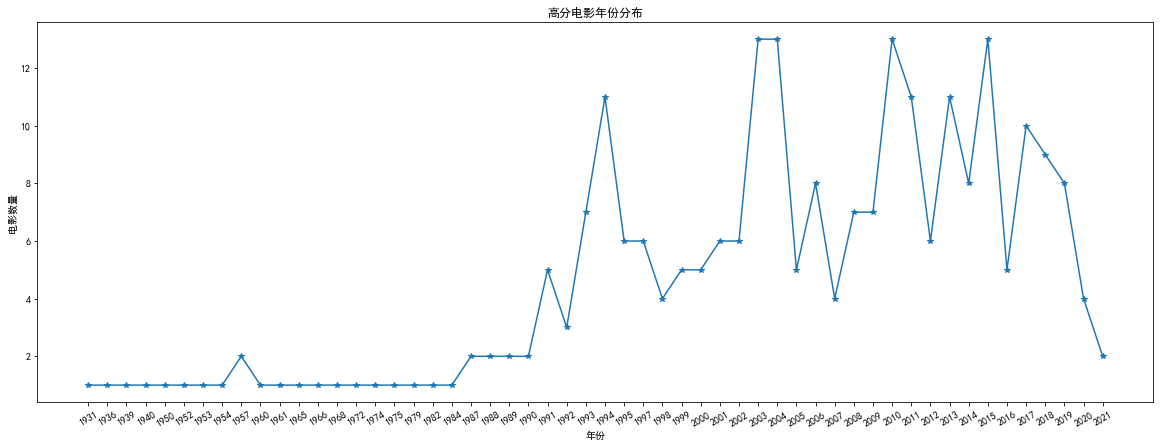

In [6]:
# 分析高分电影的年份分布
d = {}
xy = []
# 遍历所有数据
for i in data_movie:
    # 为每一个年份设置一个键，统计该年份电影数量
    year = i[4].split('-')[0]
    try:
        d[year] += 1
    except:
        d[year] = 1
for i,j in d.items():
    xy.append([i,j])
# 以年份排序
xy.sort(key=lambda x:int(x[0]))
# 提取x轴
x = [i[0] for i in xy]
# 提取y轴
y = [i[1] for i in xy]
# 画图
plt.figure(figsize=(20,7))
plt.xticks(rotation=30)
plt.title('高分电影年份分布')
plt.xlabel('年份')
plt.ylabel('电影数量')
plt.plot(x,y,marker='*')
plt.show()

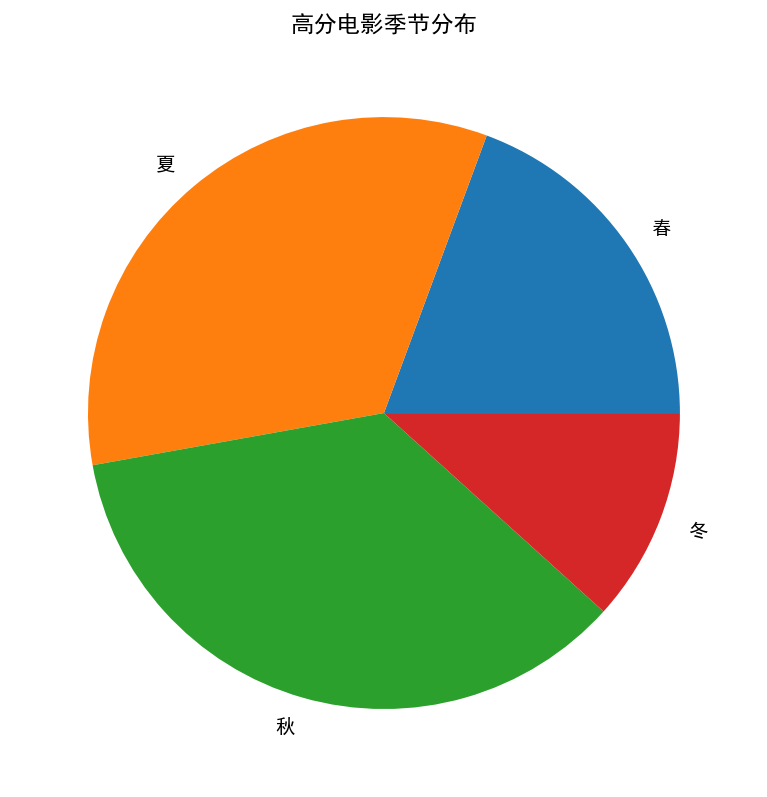

In [7]:
# 分析高分电影的季节分布
d = {}
xy = []
# 遍历所有数据
for i in data_movie:
    # 提取其中月份
    try:
        year = int(i[4].split('-')[1])
    except:
        continue
    # 分类到4个季节中并统计电影数量
    try:
        d[year//4] += 1
    except:
        d[year//4] = 1
for i,j in d.items():
    xy.append([i,j])
# 按照季节排序
xy.sort(key=lambda x:int(x[0]))
# 提取xy轴
x = [i[0] for i in xy]
y = [i[1] for i in xy]
# 画图
plt.figure(figsize=(20,7),dpi=140)
plt.pie(labels=['春','夏','秋','冬'],x=y)
plt.title('高分电影季节分布')
plt.show()

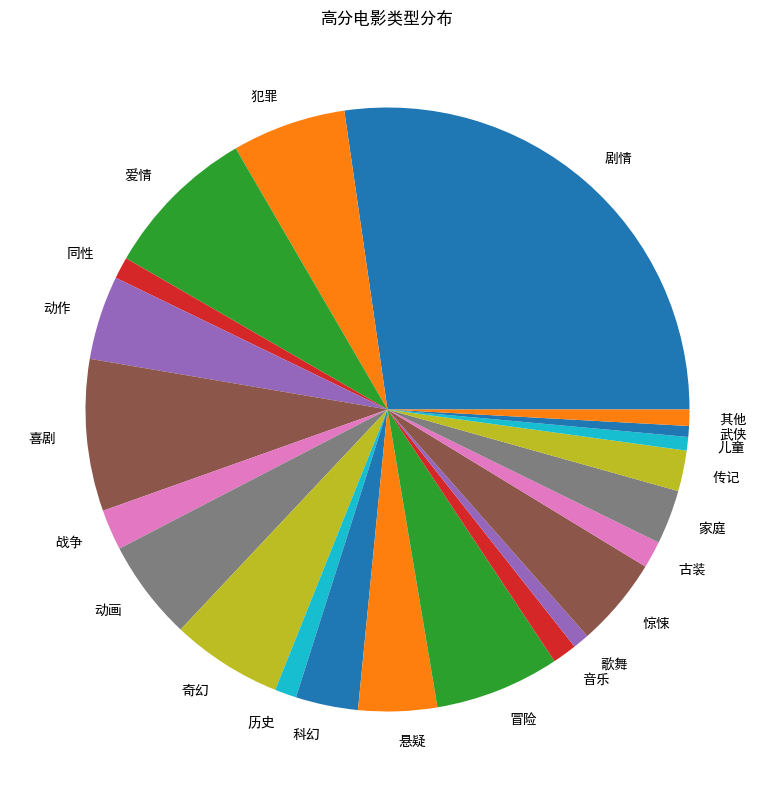

In [8]:
# 分析高分电影的类型分布
d = {}
xy = []
for i in data_movie:
    cate = i[5].split('/')
    for j in cate:
        try:
            d[j] += 1
        except:
            d[j] = 1
other = 0
for i,j in d.items():
    if j <= 3:
        other += 1
    else:
        xy.append([i, j])
x = [i[0] for i in xy]
y = [i[1] for i in xy]
x.append('其他')
y.append(other)
plt.figure(figsize=(25,10),dpi=100)
plt.pie(labels=x,x=y)
plt.title('高分电影类型分布')
plt.show()

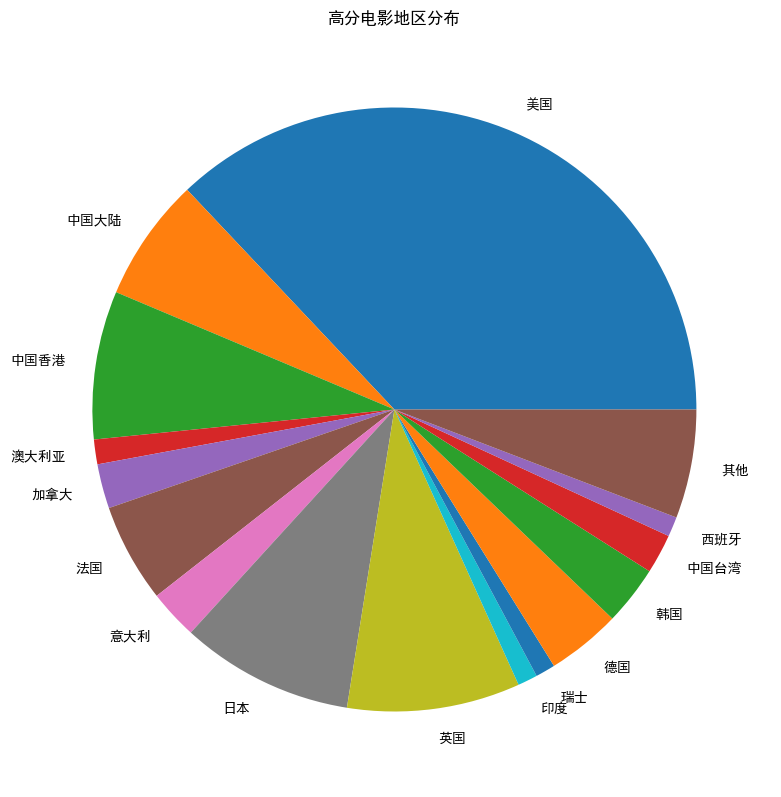

In [9]:
# 分析高分电影的地区分布
d = {}
xy = []
for i in data_movie:
    cate = i[9].split('/')
    for j in cate:
        try:
            d[j] += 1
        except:
            d[j] = 1
other = 0
for i, j in d.items():
    if j <= 3:
        other += 1
    else:
        xy.append([i, j])
x = [i[0] for i in xy]
y = [i[1] for i in xy]
x.append('其他')
y.append(other)
plt.figure(figsize=(25,10),dpi=100)
plt.pie(labels=x,x=y)
plt.title('高分电影地区分布')
plt.show()

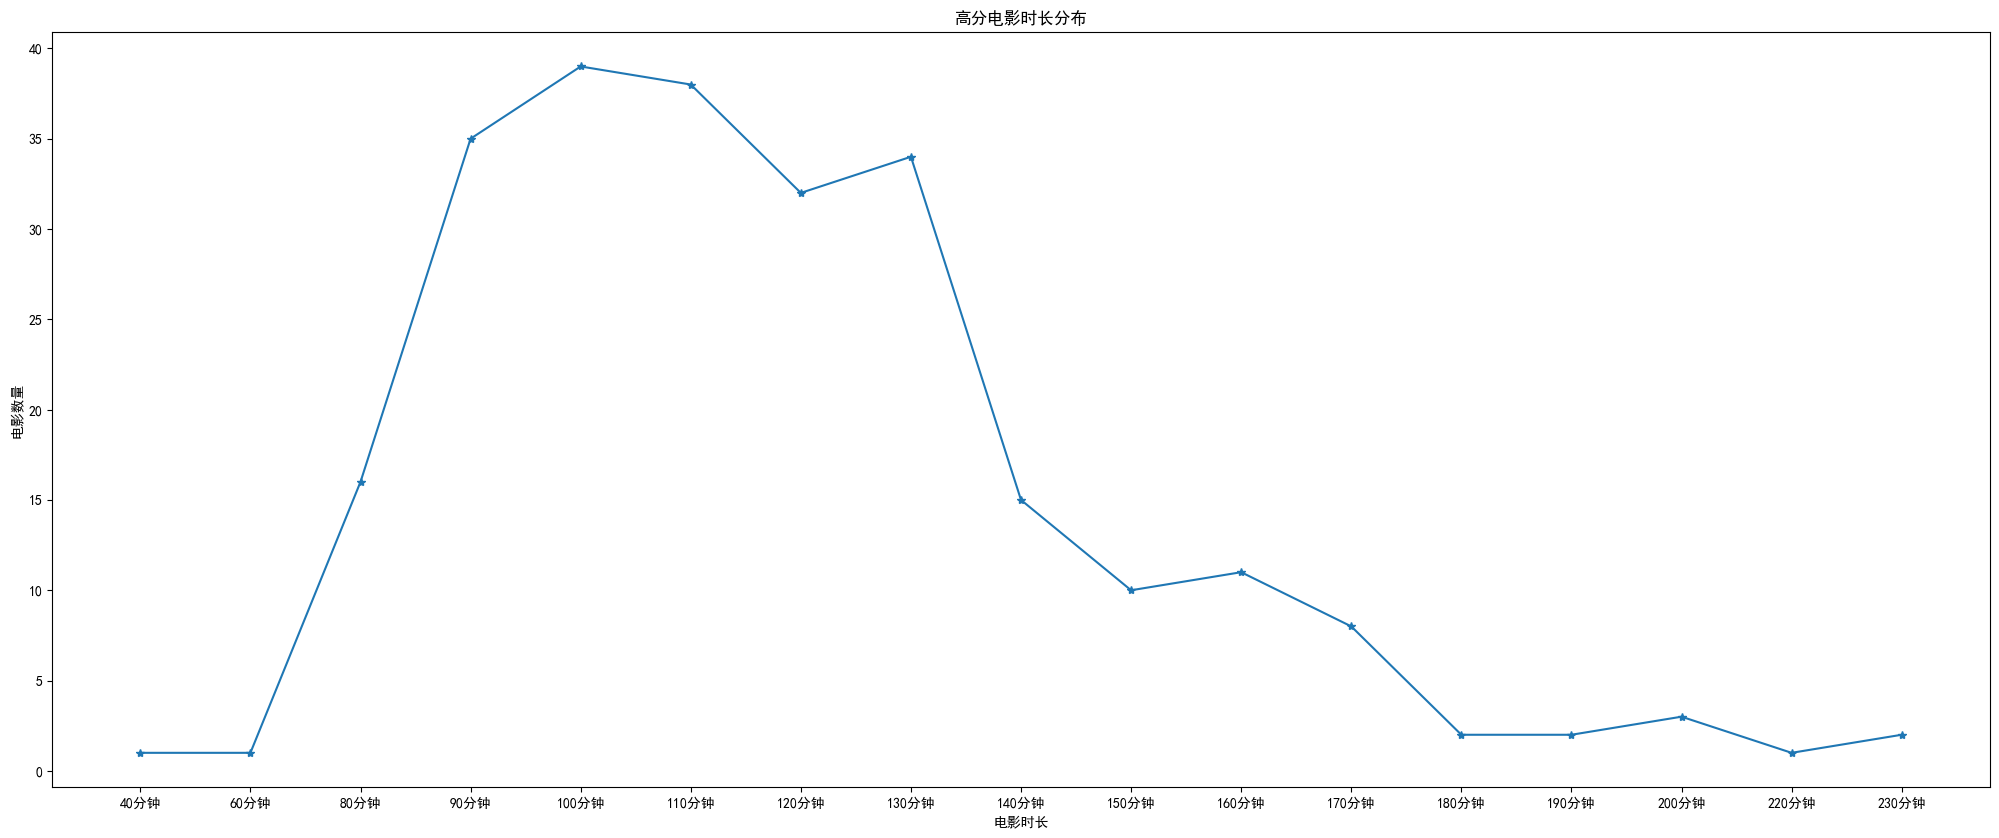

In [10]:
# 高分电影时长分布
d = {}
xy = []
for i in data_movie:
    time = int(i[-5].replace('分钟',''))
    try:
        d[time//10] += 1
    except:
        d[time//10] = 1
for i, j in d.items():
    xy.append([i, j])
xy.sort(key=lambda x:int(x[0]))
x = [str(i[0])+'0分钟' for i in xy]
y = [i[1] for i in xy]
plt.figure(figsize=(25,10),dpi=100)
plt.plot(x,y,marker='*')
plt.title('高分电影时长分布')
plt.xlabel('电影时长')
plt.ylabel('电影数量')
plt.show()

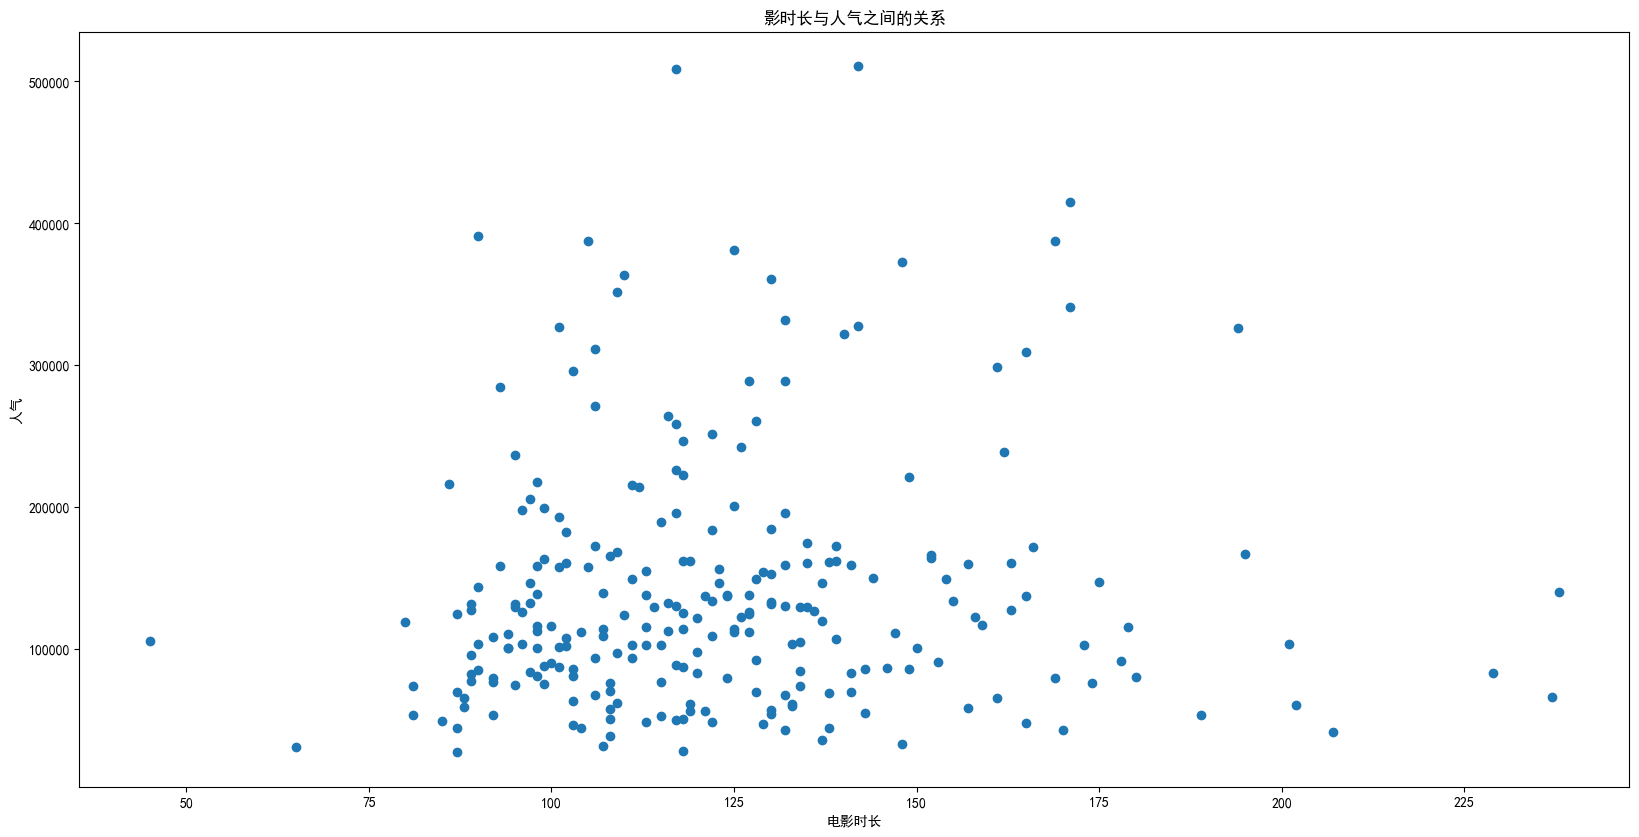

In [11]:
# 电影时长与人气之间的关系
d = {}
xy = []
for i in data_movie:
    time = int(i[-5].replace('分钟',''))
    xy.append([time, i[8]])
x = [i[0] for i in xy]
y = [i[1] for i in xy]
plt.figure(figsize=(20,10),dpi=100)
plt.scatter(x,y)
plt.title('影时长与人气之间的关系')
plt.xlabel('电影时长')
plt.ylabel('人气')
plt.show()

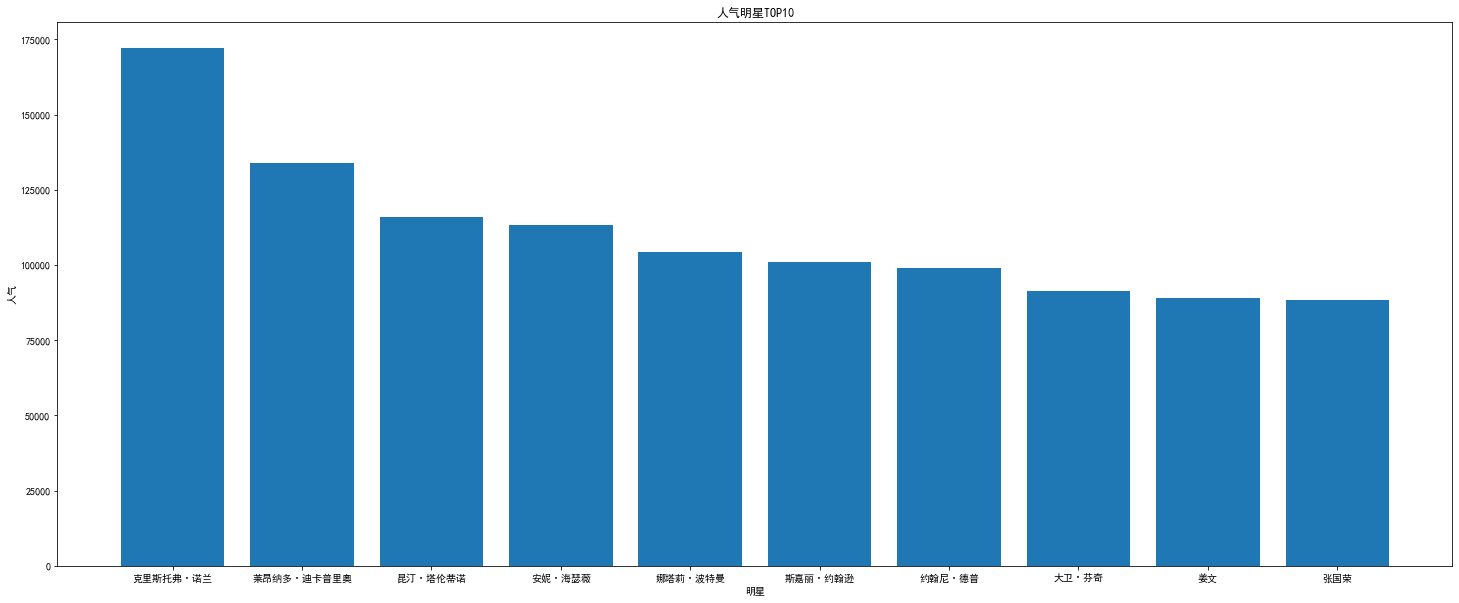

In [12]:
# 人气明星TOP10
d = {}
xy = []
for i in data_hot:
    try:
        xy.append([i[0], int(i[1])])
    except:
        continue
xy.sort(key=lambda x: int(x[1]),reverse=True)
xy = xy[:10]
x = [i[0] for i in xy]
y = [i[1] for i in xy]
plt.figure(figsize=(25,10))
plt.bar(x,y)
plt.title('人气明星TOP10')
plt.xlabel('明星')
plt.ylabel('人气')
plt.show()

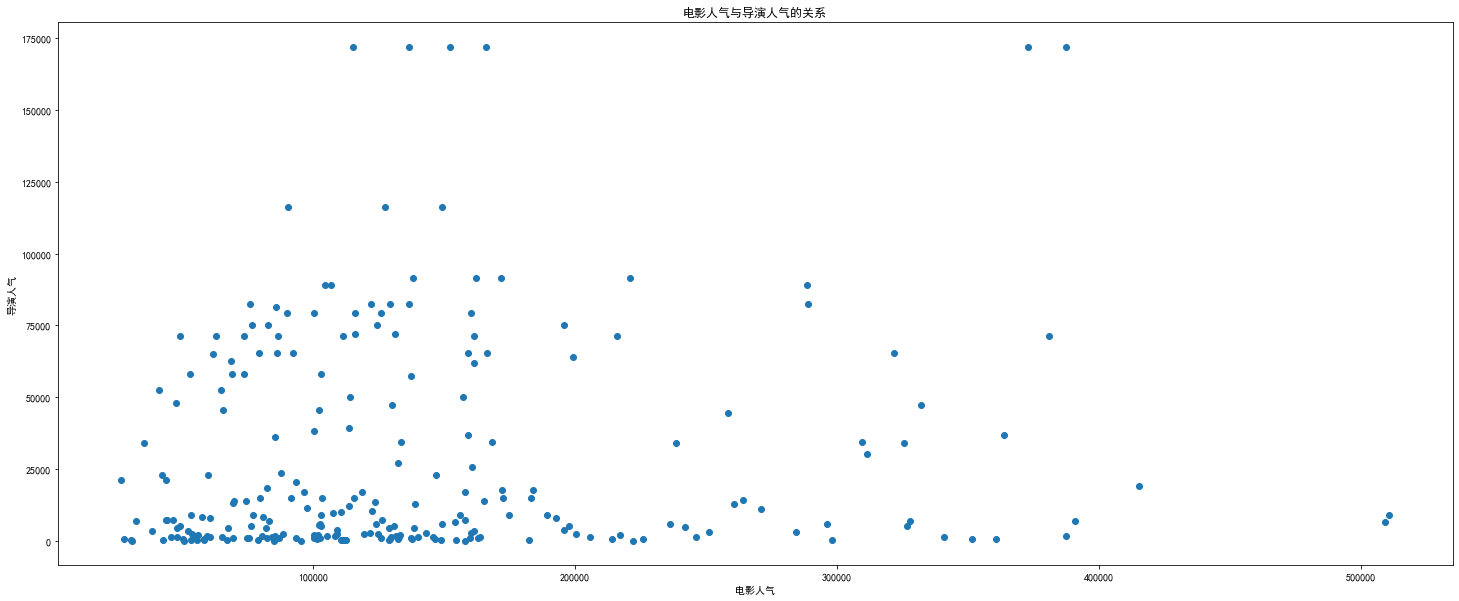

In [13]:
# 电影人气与导演人气的关系
d = {}
xy = []
for i in data_hot:
    try:
        d[i[0]] = int(i[1])
    except:
        continue
for i in data_movie:
    try:
        xy.append([i[8],d[i[1].split('/')[0]]])
    except:
        continue
x = [i[0] for i in xy]
y = [i[1] for i in xy]
plt.figure(figsize=(25,10))
plt.scatter(x,y)
plt.xlabel('电影人气')
plt.ylabel('导演人气')
plt.title('电影人气与导演人气的关系')
plt.show()

## 3. 评论文本可视化分析
对content.csv评论文本数据集进行分词处理，绘制可视化词云

In [14]:
# 将评论数据读入
content = []
with open('content.csv','r',encoding='utf-8') as f:
    # 设置csv读变量
    f_csv = csv.reader(f)
    # 遍历该变量，将数据全部插入content中
    for i in f_csv:
        content.append(i[0])

In [15]:
# 利用循环遍历字符串，两两提取进行分词,同时去除所有停用词
object_list = []
# 加载停用词集合
with open('stopword.txt', 'r', encoding='UTF-8') as meaninglessFile:
        stopwords = set(meaninglessFile.read().split('\n'))
stopwords.add(' ')
# 遍历所有句子
for i in content:
    # 遍历每个字
    for c in range(len(i)-1):
        # 若该字以及下一个字都不在停用词中且都不为字母
        if i[c] not in stopwords and not i[c].islower():
            if i[c+1] not in stopwords and not i[c+1].islower():
                # 将这两个字作为词插入结果列表中
                object_list.append(i[c]+i[c+1])

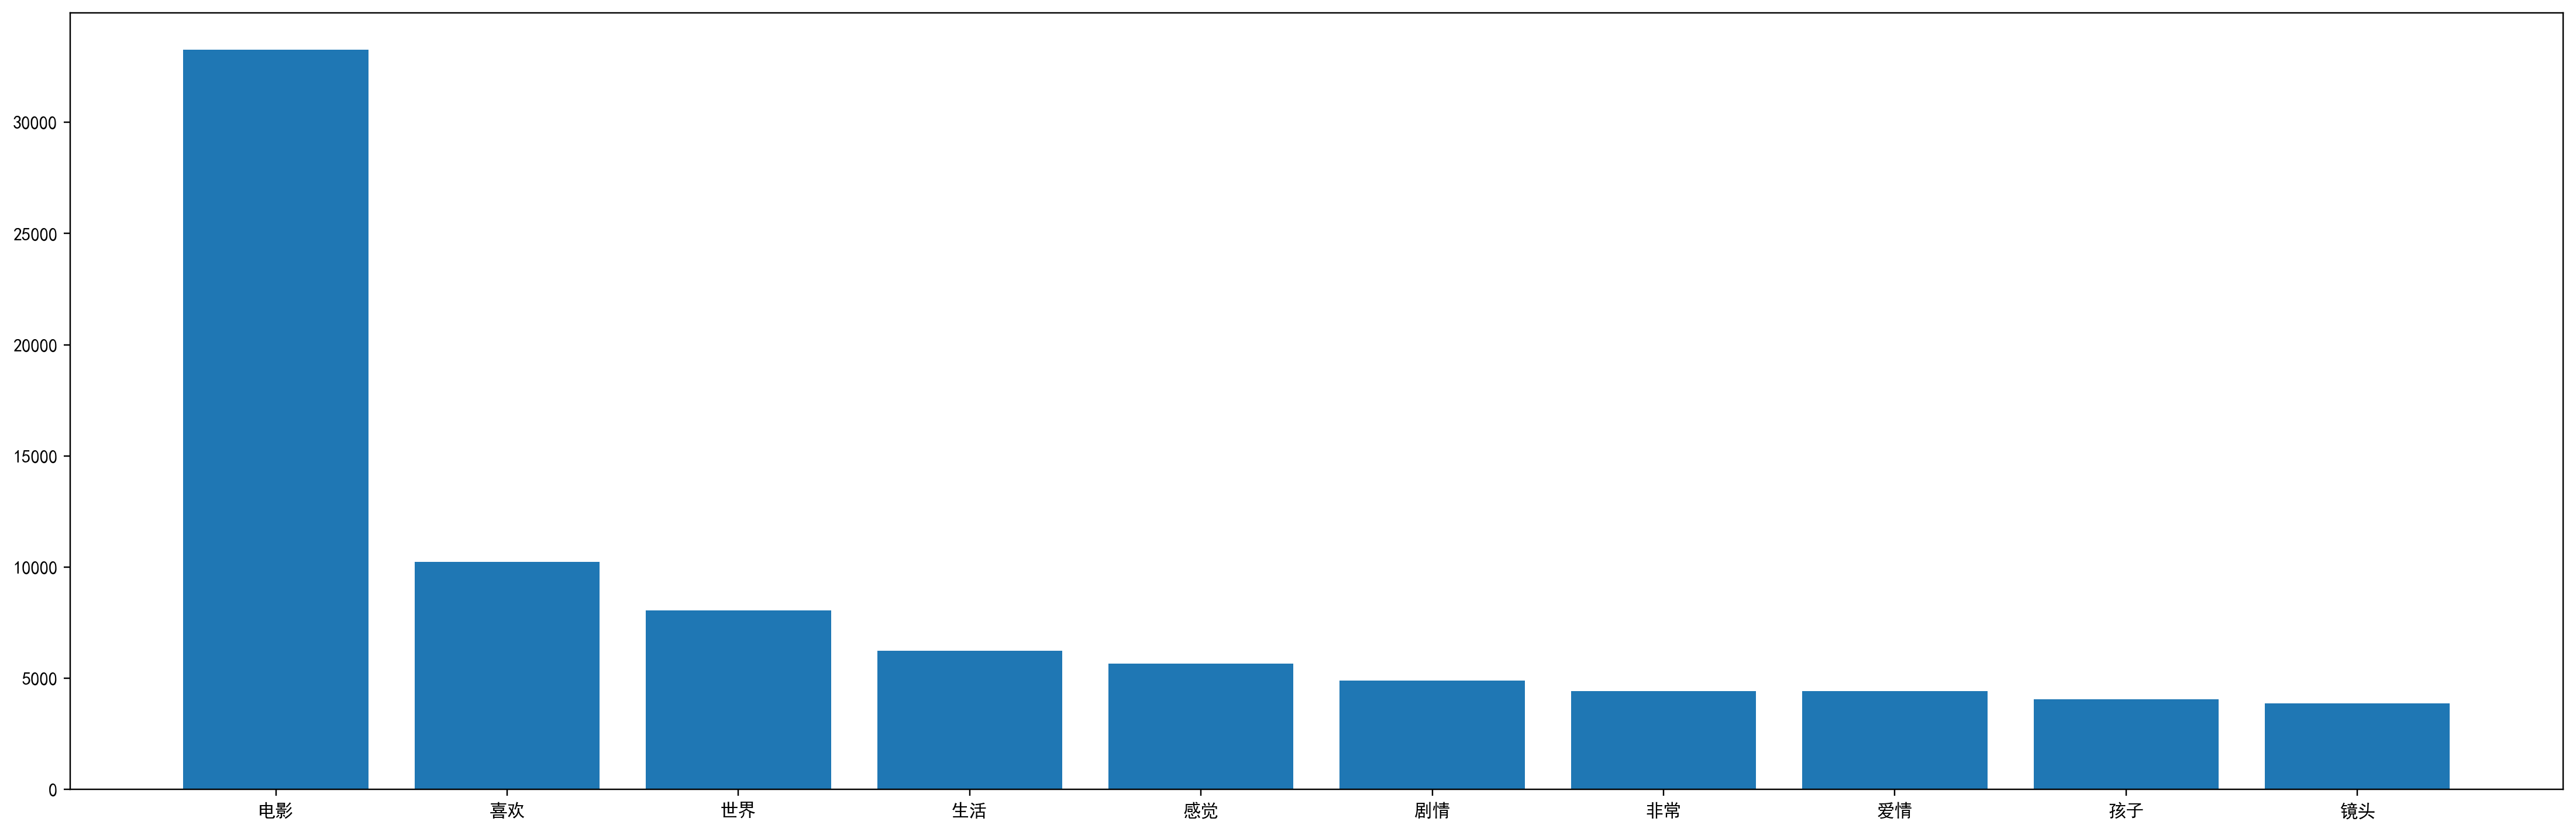

In [16]:
# 利用字典数据结构对分词后的列表统计，之后使用对词频统计结果可视化
d = {}
# 遍历刚刚获得的词
for i in object_list:
    # 将字典中该词的出现频率加一
    d[i] = d.get(i,0)+1
# 将该字典转化为列表进行排序，以频率为key，降序排序，提取前10
word_max = sorted(Counter(d).items(),key=lambda x:x[1],reverse=True)[:10]
# 提取xy轴
x = [i[0] for i in word_max]
y = [i[1] for i in word_max]
# 画图
plt.figure(figsize=(25,8),dpi=220)
plt.bar(x,y)
plt.show()